In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
# 因为鸢尾花具有三个类别，4个特征，此处仅使用其中两个特征，并且移除一个类别（类别0）。
X = X[y != 0, 2:]
y = y[y != 0]
# 此时，y的标签为1与2，我们这里将其改成0与1。（仅仅是为了习惯而已）
y[y == 1] = 0
y[y == 2] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
# penalty：正则化方式。可选值为：
# l1：L1正则化。
# l2（默认值）：L2正则化。
# elasticnet：弹性网络正则化。
# None：不使用正则化，在这种情况下，会使用L2正则化，并将C值设置为无穷大。
# C：正则化强度，类似于线性回归中的alpha参数值。可以看做C为alpha的倒数，默认值为1.0。
# solver：优化求解算法。可选值为：
# liblinear：使用C++的liblinear库，支持ovr，不支持multinomial。支持L1，L2正则化。
# newton-cg：牛顿法，使用海森（Hessian）矩阵（损失函数的二阶偏导）的逆矩阵来更新权重。支持L2正则化
# 与不使用正则化。
# lbfgs（默认值）：拟牛顿法，牛顿法的一种变体，不去计算海森矩阵，而是近似去构造海森矩阵。
# 支持L2正则化与不使用正则化。
# sag：平均随机梯度下降法（Stochastic Average Gradient Descent），类似于梯度下降，只是
# 在更新权重时，考虑样本旧的梯度值。支持L2正则化与不使用正则化。
# saga：sag的一种变体（改进），理论上具有更好的收敛速度，支持所有类型正则化。
# multi_class：多分类的实现方式，可选值为：
# auto（默认值）：如果二分类，或者sover为liblinear，使用ovr，其他情况使用multinomial。
# ovr：one-versus-rest实现方式。
# multinomial：多项式实现方式。
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print("权重：", lr.coef_)
print("偏置：", lr.intercept_)
print("真实值：", y_test)
print("预测值：", y_hat)


权重： [[2.54536368 2.15257324]]
偏置： [-16.08741502]
真实值： [1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1]
预测值： [1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1]


In [2]:
# 结果可视化

前5个样本的预测概率：
[[0.46933862 0.53066138]
 [0.98282882 0.01717118]
 [0.72589695 0.27410305]
 [0.91245661 0.08754339]
 [0.80288412 0.19711588]]
使用概率预测结果：
[1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1]


Text(0.5, 1.0, '逻辑回归分类概率')

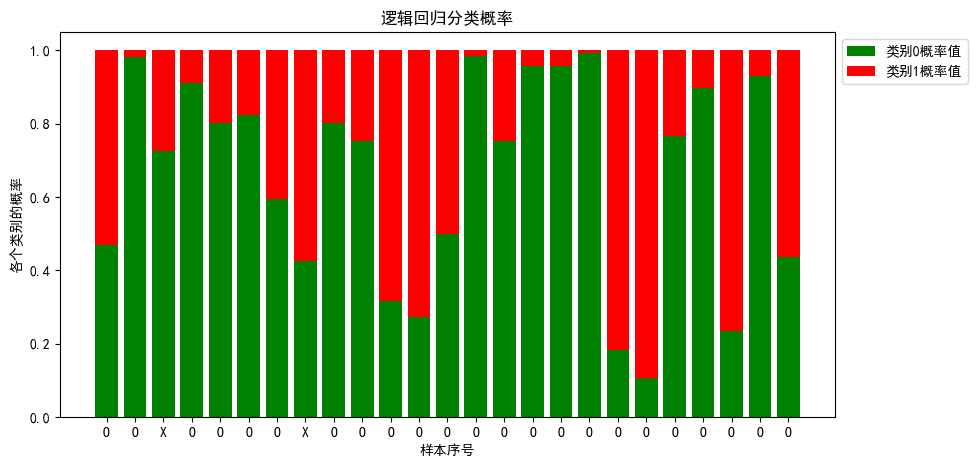

In [7]:
# 计算概率值
# 获取预测的概率值，包含数据属于每个类别的概率。
probability = lr.predict_proba(X_test)
print("前5个样本的预测概率：")
print(probability[:5])
# 获取每一行最大值的索引，就等价于预测结果。
print("使用概率预测结果：")
print(np.argmax(probability, axis=1))
# 产生序号，用于可视化的横坐标。
index = np.arange(len(X_test))
# 分别获取类别0与类别1的概率。
pro_0 = probability[:, 0]
pro_1 = probability[:, 1]
tick_label = np.where(y_test == y_hat, "O", "X")
plt.figure(figsize=(10, 5))
# 绘制堆叠图
plt.bar(index, height=pro_0, color="g", label="类别0概率值")
# bottom=x，表示从x的值开始堆叠上去。
# tick_label 设置标签刻度的文本内容。
plt.bar(index, height=pro_1, color='r', bottom=pro_0, label="类别1概率值",tick_label=tick_label)
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.xlabel("样本序号")
plt.ylabel("各个类别的概率")
plt.title("逻辑回归分类概率")



In [8]:
# 用于绘制决策边界的类。
from sklearn.inspection import DecisionBoundaryDisplay
# 颜色映射的类，在可视化时，可以显示不同的颜色主题风格。
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, ax=None):
    if not ax:
        ax = plt.gca()
    # 定义不同类别的颜色与符号。可以用于二分类与三分类。
    color = ["r", "g", "b"]
    marker = ["o", "v", "x"]
    # 获取数据中不重复的标签。
    class_label = np.unique(y)
    # 定义颜色映射，在绘制（填充）等高线的时候使用，不同的值使用不同的颜色来填充。
    cmap = ListedColormap(color[: len(class_label)])
    # 创建DecisionBoundaryDisplay类的对象，用于显示决策边界。
    # estimator：评估器，即模型，指决策边界显示哪个模型的预测结果。
    # X：数据集，必须为m行2列的数据。用来确定决策边界的范围。
    # response_method：模型的预测结果是由什么方式产生的。
    # alpha：透明度，取值范围为0-1,0为完全透明，1为不透明。
    # ax：指定绘图的axes对象。即在哪个axes对象上绘制。
    # grid_resolution：用于绘制决策边界的网格点数。如果分解曲线不够平滑，可增大该值。
    DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict",alpha=0.5, cmap=cmap, grid_resolution=300,ax=ax)
    # 绘制样本数据X。
    for i, class_ in enumerate(class_label):
        ax.scatter(x=X[y == class_, 0], y=X[y == class_, 1],c=cmap.colors[i], label=f"类别{class_}", marker=marker[i])
    ax.legend()

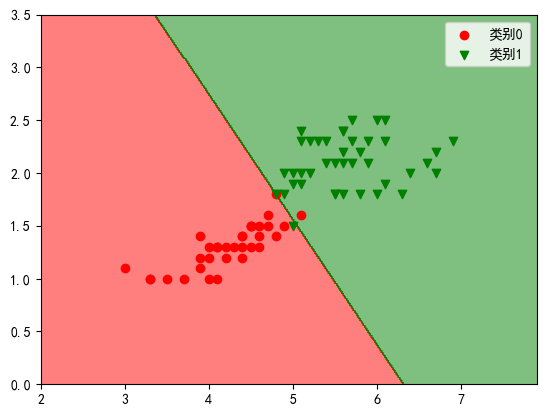

In [10]:
plot_decision_boundary(lr, X_train, y_train)
